In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
reference_squat_joints_df = pd.read_csv("../results/reference_squat.csv")
reference_squat_joints_df.head()

,frame,x,y,z,visibility,joint_id
0,1,0.599901,0.238705,-0.034698,0.999907,11
1,1,0.422649,0.222451,-0.221915,0.999985,12
2,1,0.659558,0.360007,-0.234058,0.964206,13
3,1,0.344892,0.354452,-0.444101,0.996534,14
4,1,0.678087,0.246286,-0.680997,0.983496,15


In [30]:
start_position_df = reference_squat_joints_df[reference_squat_joints_df['frame'] == 1]
start_position_df

,frame,x,y,z,visibility,joint_id
0,1,0.599901,0.238705,-0.034698,0.999907,11
1,1,0.422649,0.222451,-0.221915,0.999985,12
2,1,0.659558,0.360007,-0.234058,0.964206,13
3,1,0.344892,0.354452,-0.444101,0.996534,14
4,1,0.678087,0.246286,-0.680997,0.983496,15
5,1,0.341483,0.240351,-0.835514,0.997377,16
6,1,0.572526,0.509424,0.066845,0.999448,23
7,1,0.463881,0.515774,-0.066835,0.999731,24
8,1,0.596178,0.713141,0.071053,0.989251,25
9,1,0.432236,0.734638,-0.127603,0.996040,26


In [83]:
import yaml

def show_position(joints: pd.DataFrame):
    with open('../configs/config.yaml') as file:
        data = yaml.safe_load(file)
        connections = data['pose_landmarker']['connections']['torso']
    fig = plt.figure()
    fig.subplots_adjust(left=0.0, right=1, bottom=0, top=1)

    axis = fig.add_subplot(111, projection="3d")
    axis.view_init(elev=-69, azim=-90)

    axis.scatter3D(
        xs=joints['x'],
        ys=joints['y'],
        zs=joints['z'],
    )
    axis.set_xlabel("X")
    axis.set_ylabel("Y")
    axis.set_zlabel("Z")
    for connection in connections:
        try:
            joint_start, joint_end = connection

            start_coords = joints[joints['joint_id'] == joint_start]
            end_coords = joints[joints['joint_id'] == joint_end]
            axis.plot(
                xs=[start_coords['x'], end_coords['x']],
                ys=[start_coords['y'], end_coords['y']],
                zs=[start_coords['z'], end_coords['z']],
            )
        except (KeyError, ValueError):
            continue


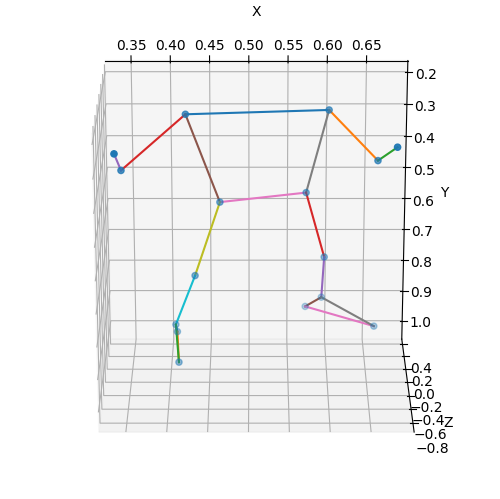

In [84]:
show_position(start_position_df)

In [61]:
import sys
sys.path.append('..')
from src.utils.joints_data_handler import JointsDataHandler

handler = JointsDataHandler('pose_landmarker')
for frame in reference_squat_joints_df['frame'].unique():
    handler.add_joints(reference_squat_joints_df[reference_squat_joints_df['frame'] == frame].to_numpy(), frame)

In [68]:
for frame in reference_squat_joints_df['frame'].unique():
    print(f"Kąt ugięcia kolan: {handler.calculate_angle_between_joints(23, 25, 27, frame - 1)}, klatka: {frame}")

Kąt ugięcia kolan: 7.087349400306002, klatka: 1
Kąt ugięcia kolan: 7.311133633550748, klatka: 2
Kąt ugięcia kolan: 7.37640779893745, klatka: 3
Kąt ugięcia kolan: 13.367034415839477, klatka: 4
Kąt ugięcia kolan: 31.04689728658768, klatka: 5
Kąt ugięcia kolan: 49.01702629833193, klatka: 6
Kąt ugięcia kolan: 67.0334468209828, klatka: 7
Kąt ugięcia kolan: 80.41732232488403, klatka: 8
Kąt ugięcia kolan: 95.50421977323637, klatka: 9
Kąt ugięcia kolan: 109.1061630289437, klatka: 10
Kąt ugięcia kolan: 120.98156085940707, klatka: 11
Kąt ugięcia kolan: 121.80585587505848, klatka: 12
Kąt ugięcia kolan: 117.86339658608732, klatka: 13
Kąt ugięcia kolan: 107.69719847269809, klatka: 14
Kąt ugięcia kolan: 98.83471117178783, klatka: 15
Kąt ugięcia kolan: 83.78012551726557, klatka: 16
Kąt ugięcia kolan: 65.19882704348171, klatka: 17
Kąt ugięcia kolan: 48.879937025031715, klatka: 18
Kąt ugięcia kolan: 33.413799050011605, klatka: 19
Kąt ugięcia kolan: 17.149593659628067, klatka: 20
Kąt ugięcia kolan: 7.18

## Kolejne fazy ćwiczenia:

1. Start - ugięcie kolan: 10° <
2. Schodzenie - ugięcie kolan: 40° < 60°
3. Dół - ugięcie kolan: < 115°
4. Wznoszenie - ugięcie kolan: 40° < 60°
5. Koniec - ugięcie kolan: 10° <

In [74]:
up_positions_df = []
mid_positions_df = []
down_positions_df = []

for frame in reference_squat_joints_df['frame'].unique():
    knees_angle = handler.calculate_angle_between_joints(23, 25, 27, frame - 1)
    currect_frame_df = reference_squat_joints_df[reference_squat_joints_df['frame'] == frame]
    if knees_angle < 10.:
        up_positions_df.append(currect_frame_df)
    elif 40. < knees_angle < 50.:
        mid_positions_df.append(currect_frame_df)
    elif 115. < knees_angle:
        down_positions_df.append(currect_frame_df)
    else:
        continue

In [75]:
start_position_df = up_positions_df[0]
going_down_position_df = mid_positions_df[0]
down_position_df = down_positions_df[0]
going_up_position = mid_positions_df[-1]
end_position_df = up_positions_df[-1]

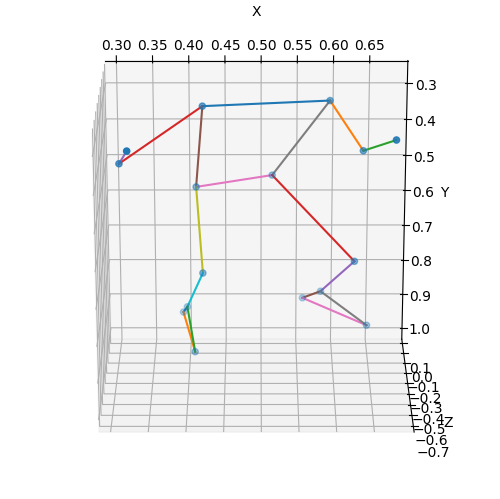

In [86]:
show_position(going_up_position)